# CLUSTERING

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans


## K-MEANS

Creamos y visualizamos una nube de puntos aleatoria.

In [2]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=57)

In [3]:
data=pd.DataFrame(X, columns=[['dato_1','dato_2']])
data['y']=y
data.columns = data.columns.get_level_values(0) #Para que no coja como multitindice
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dato_1  2000 non-null   float64
 1   dato_2  2000 non-null   float64
 2   y       2000 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 39.2 KB


In [4]:
data.head()

,dato_1,dato_2,y
0,-1.586799,2.414913,1
1,-2.810857,1.384068,4
2,-2.765975,1.202717,4
3,-1.890354,2.334948,1
4,-2.904750,1.304085,4


Text(0, 0.5, 'Dato 2')

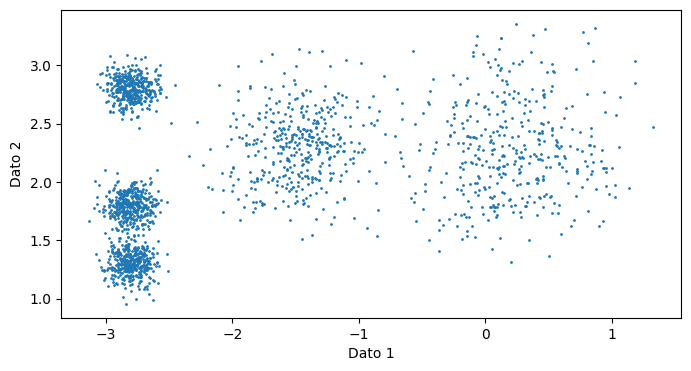

In [5]:
plt.figure(figsize=(8, 4))
plt.scatter(data.dato_1,data.dato_2,s=1) #s: tamaño de los puntos

plt.xlabel('Dato 1')
plt.ylabel('Dato 2')

Algoritmo k-mean para ajustar y agrupar.

In [6]:
k=5

#Creamos el objeto 
kmeans=KMeans(n_clusters=k, n_init='auto', random_state=42)

#Entrenamiento. Importante hcaer FIT_predict con los datos de ENTRENAMIENTO
y_pred=kmeans.fit_predict(X)

In [7]:
kmeans.cluster_centers_ #los k centroides estimados

array([[-1.46239625,  2.30094224],
       [-2.80167447,  1.55420085],
       [ 0.26125934,  2.00370267],
       [-2.79553267,  2.80030141],
       [ 0.13768416,  2.68286179]])

### Hard Clustering vs Soft Clustering

In [8]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5], [-1,2], [-2.5,1.5]])
kmeans.predict(X_new) #le asigna un cluster a cada nueva instancia

array([2, 2, 3, 3, 0, 1])

In [9]:
kmeans.transform(X_new) #Distancia de cada instancia a los k centroides (se asgna el de menor distancia)

array([[1.4930402 , 2.83692028, 0.26128557, 2.90783171, 0.69660402],
       [4.47253245, 5.8187768 , 2.73874317, 5.85052829, 2.94264374],
       [1.68905507, 1.45933827, 3.41004704, 0.28580836, 3.15367065],
       [1.55043519, 0.966369  , 3.29880637, 0.36330129, 3.14300817],
       [0.55170329, 1.85600856, 1.26126477, 1.96581279, 1.32688563],
       [1.31077458, 0.30650484, 2.80682552, 1.3334629 , 2.89076802]])

### Inercia

Para evaluar el rendimiento del modelo k-mean. Cuanto menor sea la inercia mejor pero mucho cuidado. La inercia es la suma de las distancias al cuadrado entre cada instancia de entrenamiento y su centroide más cercano

In [10]:
kmeans.inertia_

229.9898864318431

In [11]:
kmeans.score(X) #inercia negativa

-229.98988643184316

### Inizializaciones multiples

In [12]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm='lloyd', random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=11)

In [13]:
kmeans_rnd_10_inits.inertia_

224.28169923610295

## K-MEANS ++

En lugar de inicializar los centroides de forma totalmente aleatoria, se inizializan utilizando un algoritmo de probabilidades (unicamente el primer centroide sera asignado de manera aleatoria). `init="k-means++"` 

## MINI-BATCH K-MEANS

Divide nuestros datos en minilotes para agilizar el trabajp. Mas rapido que el kmeans original.

In [14]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, n_init='auto')
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init='auto', random_state=42)

In [15]:
minibatch_kmeans.inertia_

236.71209003821392

## NUMERO OPTIMO DE CLUSTERS


In [16]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Text(0, 0.5, 'Inertia')

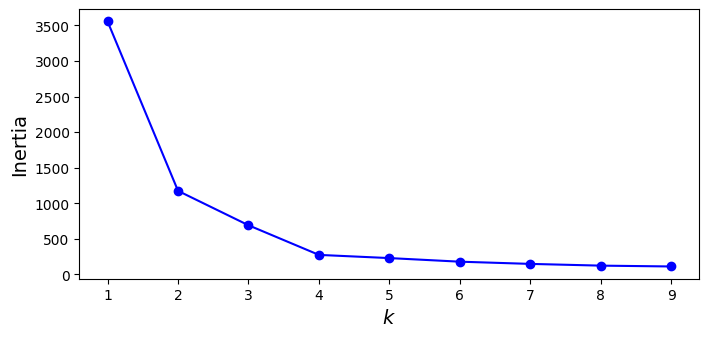

In [32]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

Seleccion optima: k=4 (k=5 tambien da buenos resultados)

### Puntuacion de la silueta